<a href="https://colab.research.google.com/github/khus158/Titanic-Classification/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

train = pd.read_csv('/content/train.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

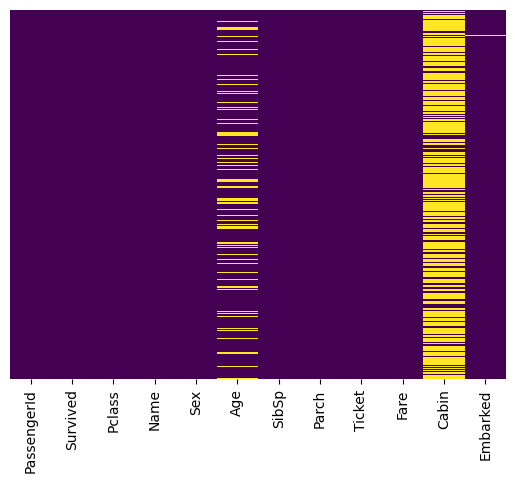

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


<ipython-input-5-05742e5567b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

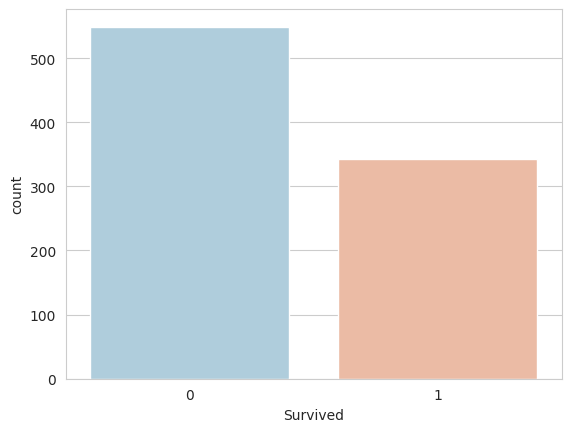

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

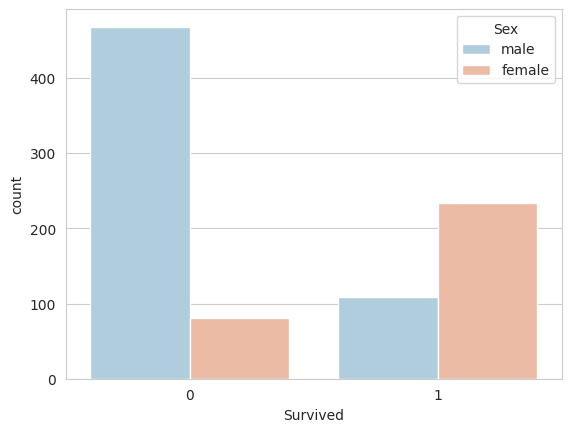

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

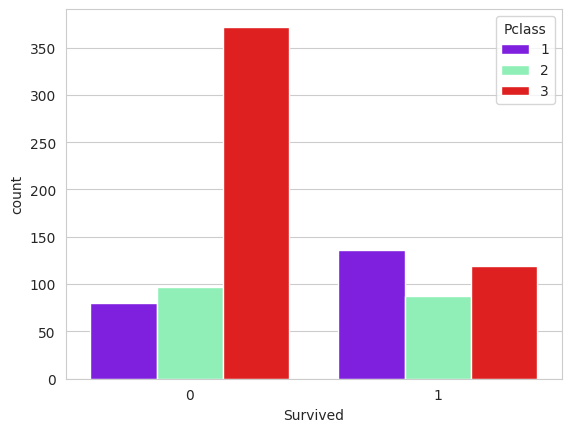

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [ ]:
sns.countplot(x='SibSp',data=train)

In [ ]:
sns.countplot(x='Parch',data=train)

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<ipython-input-8-cfcb1009f43f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-8-cfcb1009f43f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

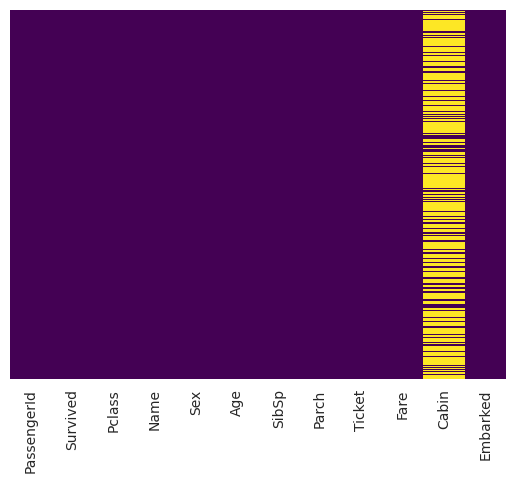

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Embarked'] = train['Embarked'].fillna('S')


sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
331,332,1,45.5,0,0,28.500
700,701,1,18.0,1,0,227.525
748,749,1,19.0,1,0,53.100
751,752,3,6.0,0,1,12.475
481,482,2,29.0,0,0,0.000


In [ ]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[45  6]
 [22 17]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        51
           1       0.74      0.44      0.55        39

    accuracy                           0.69        90
   macro avg       0.71      0.66      0.66        90
weighted avg       0.70      0.69      0.67        90



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test,dt_pred))

[[44  7]
 [25 14]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
rf_pre=rf.predict(X_test)
print(confusion_matrix(y_test,rf_pre))

[[46  5]
 [22 17]]


In [ ]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        51
           1       0.77      0.44      0.56        39

    accuracy                           0.70        90
   macro avg       0.72      0.67      0.67        90
weighted avg       0.72      0.70      0.68        90



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_pred = xgboost.predict(X_test)
print(confusion_matrix(y_test,xg_pred))

[[44  7]
 [23 16]]


In [ ]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        51
           1       0.70      0.41      0.52        39

    accuracy                           0.67        90
   macro avg       0.68      0.64      0.63        90
weighted avg       0.67      0.67      0.65        90



In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

# Initialize the ANN
ann = Sequential()

# Add the input layer and the first hidden layer
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=9))

# Add the second hidden layer
ann.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))

# Add the output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the ANN
ann.compile(optimizer='adam',
            loss='binary_crossentropy',  # 'mean_squared_error' is not typically used for classification problems
            metrics=['accuracy'])

# Summary of the model
ann.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Assuming X_train has 6 features
ann = Sequential()
ann.add(Dense(units=32, activation='relu', input_dim=6))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, batch_size=32, epochs=300, verbose=0)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
print(confusion_matrix(y_test,ann_pred))

[[38 13]
 [17 22]]


In [ ]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        51
           1       0.63      0.56      0.59        39

    accuracy                           0.67        90
   macro avg       0.66      0.65      0.66        90
weighted avg       0.66      0.67      0.66        90



<Axes: >

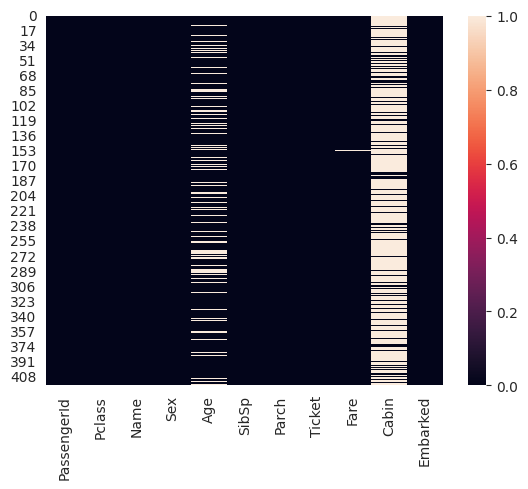

In [ ]:
test = pd.read_csv('/content/test.csv')
sns.heatmap(test.isnull())

In [ ]:
test.drop('Cabin',axis=1,inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:

test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex_test,embark_test],axis=1)

<ipython-input-8-cfcb1009f43f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-8-cfcb1009f43f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , epochs=300,verbose= 0)


In [ ]:
# Check the shape of the test data
print("Shape of test data:", test.shape)

# Check the shape of the training data
print("Shape of X_train data:", X_train.shape)



Shape of test data: (418, 9)
Shape of X_train data: (801, 6)


In [ ]:
# For training data
print("Training Features:")
print(X_train.columns.tolist())

# For test data
print("Test Features:")
print(test.columns.tolist())



Training Features:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Test Features:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']


In [ ]:
# Assuming X_train and test are pandas DataFrames
common_features = X_train.columns.intersection(test.columns)


In [ ]:
# Selecting common features from both training and test sets
X_train_common = X_train[common_features]
test_common = test[common_features]


In [ ]:
print("Shape of X_train_common:", X_train_common.shape)
print("Shape of test_common:", test_common.shape)


Shape of X_train_common: (801, 6)
Shape of test_common: (418, 6)


In [ ]:
print("Training Data Preview:")
print(X_train_common.head())

print("Test Data Preview:")
print(test_common.head())


Training Data Preview:
     PassengerId  Pclass   Age  SibSp  Parch      Fare
825          826       3  24.0      0      0    6.9500
8              9       3  27.0      0      2   11.1333
689          690       1  15.0      0      1  211.3375
513          514       1  54.0      1      0   59.4000
729          730       3  25.0      1      0    7.9250
Test Data Preview:
   PassengerId  Pclass   Age  SibSp  Parch     Fare
0          892       3  34.5      0      0   7.8292
1          893       3  47.0      1      0   7.0000
2          894       2  62.0      0      0   9.6875
3          895       3  27.0      0      0   8.6625
4          896       3  22.0      1      1  12.2875


In [ ]:
# Add missing columns with default values (e.g., NaN or 0)
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0  # or np.nan

for col in set(test.columns) - set(X_train.columns):
    X_train[col] = 0  # or np.nan

# Reorder columns to match
X_train = X_train[sorted(X_train.columns)]
test = test[sorted(test.columns)]

# Verify the shapes again
print("Shape of X_train:", X_train.shape)
print("Shape of test:", test.shape)


Shape of X_train: (801, 9)
Shape of test: (418, 9)


In [ ]:
# Make predictions
test_prediction = ann.predict(test_common)

# Convert predictions to binary
test_prediction_binary = [1 if y >= 0.5 else 0 for y in test_prediction]

# Create a DataFrame for predictions
test_pred = pd.DataFrame(test_prediction_binary, columns=['Survived'])

# Combine with the original test DataFrame
new_test = pd.concat([test.reset_index(drop=True), test_pred], axis=1)

# Display the combined DataFrame
print(new_test.head())



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    Age     Fare  Parch  PassengerId  Pclass      Q      S  SibSp   male  \
0  34.5   7.8292      0          892       3   True  False      0   True   
1  47.0   7.0000      0          893       3  False   True      1  False   
2  62.0   9.6875      0          894       2   True  False      0   True   
3  27.0   8.6625      0          895       3  False   True      0   True   
4  22.0  12.2875      1          896       3  False   True      1  False   

   Survived  
0         0  
1         0  
2         0  
3         0  
4         0  


In [ ]:
df= new_test[['PassengerId' ,'Survived']]

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
df.to_csv('predictions.csv' , index=False)